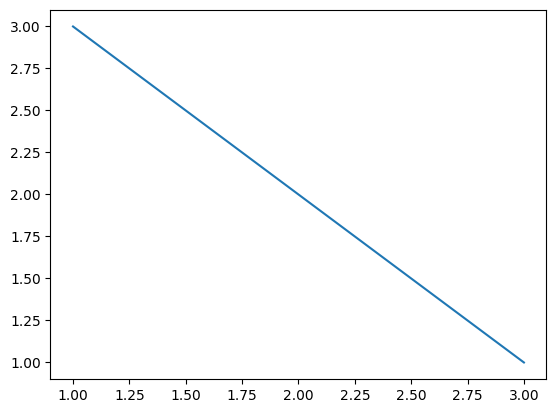

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[3,2,1])
plt.show()

## CardioRisk ML: A Machine Learning Pipeline for Heart Disease Prediction

In [8]:
pip install openpyxl


   ---------------------------------------- 0/2 [et-xmlfile]
   ---------------------------------------- 0/2 [et-xmlfile]
   ---------------------------------------- 0/2 [et-xmlfile]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_excel("heart_disease_synthetic_30000.xlsx")

In [10]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,bmi,smoking,diabetes,family_history,physical_activity_level,alcohol,hypertension,heart_disease
0,68,0,typical_angina,137.0,261.0,0,normal,145.0,no,0.3,upsloping,21.5,current,0,0,low,light,0,1
1,58,1,typical_angina,134.0,140.0,0,normal,152.0,yes,0.7,flat,31.7,never,0,0,moderate,light,0,0
2,44,0,non_anginal_pain,111.0,193.0,0,st_t_abnormality,138.0,no,1.2,flat,24.8,current,0,0,moderate,light,0,1
3,72,0,atypical_angina,114.0,232.0,0,st_t_abnormality,136.0,no,0.3,flat,22.2,current,0,0,moderate,light,0,0
4,37,1,typical_angina,127.0,253.0,1,normal,135.0,no,0.4,upsloping,21.6,never,0,0,high,moderate,0,1


In [11]:
#Drop exact duplicates
#Handle impossible values if any
df = df.drop_duplicates()

In [12]:
#Define features and target
target_col = "heart_disease"
X = df.drop(columns=[target_col])
y = df[target_col]

In [13]:
#Identify column types

In [14]:
numeric_features = ["age", "resting_bp", "cholesterol",
                    "max_hr", "oldpeak", "bmi"]

In [16]:
categorical_features = ["chest_pain_type", "resting_ecg",
                        "exercise_angina", "st_slope",
                        "smoking", "physical_activity_level",
                        "alcohol"]

In [17]:
binary_features = ["sex", "fasting_bs", "diabetes",
                   "family_history", "hypertension"]

#### Train / validation / test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#First train+val vs test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [20]:
# Then train vs validation
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1765,  # 0.1765 * 0.85 ≈ 0.15 of original
    random_state=42, stratify=y_trainval
)

#### Preprocessing pipeline

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
#Numeric preprocessing: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [23]:
#Categorical preprocessing: impute + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [24]:
# Binary features: treat as numeric (0/1), just impute if needed
binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [25]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#### Model training (LogReg, RF, XGB, LGBM, CatBoost, MLP)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

In [27]:
#Example: Logistic Regression
log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500, class_weight="balanced"))
])

In [28]:
log_reg_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_val_proba_lr = log_reg_clf.predict_proba(X_val)[:, 1]
roc_auc_lr = roc_auc_score(y_val, y_val_proba_lr)
pr_auc_lr = average_precision_score(y_val, y_val_proba_lr)

#### Stacking ensemble

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
from xgboost import XGBClassifier

In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
from lightgbm import LGBMClassifier

In [34]:
from sklearn.ensemble import StackingClassifier

In [35]:
base_estimators = [
    ("lr", LogisticRegression(max_iter=500, class_weight="balanced")),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42)),
    ("xgb", XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, eval_metric="logloss",
        random_state=42
    )),
    ("lgbm", LGBMClassifier(
        n_estimators=300, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ))
]

In [36]:
stacking_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("stack", StackingClassifier(
        estimators=base_estimators,
        final_estimator=LogisticRegression(max_iter=500),
        stack_method="predict_proba",
        passthrough=False,
        n_jobs=-1
    ))
])

In [37]:
stacking_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Hyperparameter tuning strategy (example: XGBoost)

In [38]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

In [39]:
xgb_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ))
])

In [40]:
param_distributions = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [3, 4, 5, 6],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2],
    "model__min_child_weight": [1, 3, 5]
}

In [41]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [42]:
xgb_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [43]:
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:53:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': [0.7, 0.8, ...], 'model__gamma': [0, 0.1, ...], 'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 4, ...], ...}"
,n_iter,30
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [44]:
best_xgb = xgb_search.best_estimator_

#### Random Forest model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [47]:

rf_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced"
    ))
])

In [48]:
rf_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500, class_weight="balanced"))
])

In [51]:
log_reg_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### LightGBM

In [52]:
from lightgbm import LGBMClassifier

In [53]:
lgbm_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [54]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8311, number of negative: 14088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 22399, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371043 -> initscore=-0.527743
[LightGBM] [Info] Start training from score -0.527743


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### CatBoost

In [56]:
!pip install catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 1.1 MB/s eta 0:01:31
   ---------------------------------------- 0.8/102.5 MB 1.2 MB/s eta 0:01:28
   ---------------------------------------- 1.0/102.5 MB 1.2 MB/s eta 0:01:23
    --------------------------------------- 1.3/102.5 MB 1.4 MB/s eta 0:01:14
    --------------------------------------- 1.6/102.5 MB 1.4 MB/s eta 0:01:13
    --------------------------------------- 2.1/102.5 MB 1.4 MB/s eta 0:01:12
    --------------------------------------- 2.4/102.5 MB 1.4 MB/s eta 0:01:11
   - -------------------------------------- 2.6/102.5 MB 1.5 MB/s eta 0:01:09
   - ------------------------

In [57]:
from catboost import CatBoostClassifier

In [58]:
cat_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", CatBoostClassifier(
        iterations=300,
        depth=5,
        learning_rate=0.05,
        loss_function="Logloss",
        verbose=False,
        random_seed=42
    ))
])

In [59]:
cat_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### MLP Neural Network

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
mlp_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        max_iter=300,
        random_state=42
    ))
])

In [62]:
mlp_clf.fit(X_train, y_train)

C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Put all your models in one dictionary

In [63]:
#Example: assuming you already did .fit(...) for each

models = {
    "log_reg": log_reg_clf,
    "random_forest": rf_clf,
    "xgboost": xgb_clf,         # or best_xgb if tuned
    "lightgbm": lgbm_clf,
    "catboost": cat_clf,
    "mlp": mlp_clf,
    "stacking": stacking_model
}

#### Shared evaluation function (ROC AUC, PR AUC, full metrics)

In [64]:
import numpy as np
import pandas as pd

In [65]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    precision_recall_curve
)

In [66]:
def evaluate_model(name, model, X, y, threshold=0.5):
    """
    Compute metrics + scores for one model on given X, y.
    Returns:
        metrics_dict, roc_data, pr_data
    """
    # Probabilities for positive class
    y_score = model.predict_proba(X)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Metrics
    roc_auc = roc_auc_score(y, y_score)
    pr_auc = average_precision_score(y, y_score)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, zero_division=0)
    rec = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)

    # Curves
    fpr, tpr, _ = roc_curve(y, y_score)
    precision, recall, _ = precision_recall_curve(y, y_score)

    metrics_dict = {
        "model": name,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    }

    roc_data = {"model": name, "fpr": fpr, "tpr": tpr}
    pr_data = {"model": name, "precision": precision, "recall": recall}

    return metrics_dict, roc_data, pr_data


In [67]:
best_xgb = xgb_search.best_estimator_

# very important
xgb_clf = best_xgb

In [68]:
models = {
    "log_reg": log_reg_clf,
    "random_forest": rf_clf,
    "xgboost": xgb_clf,     # ab yeh fitted hai
    "lightgbm": lgbm_clf,
    "mlp": mlp_clf,
    "stacking": stacking_model
}

In [69]:
from sklearn.exceptions import NotFittedError

for name, model in models.items():
    try:
        _ = model.predict_proba(X_val[:5])
        print(name, " => OK (fitted)")
    except NotFittedError:
        print(name, " => NOT FITTED")

log_reg  => OK (fitted)
random_forest  => OK (fitted)
xgboost  => OK (fitted)


C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


lightgbm  => OK (fitted)
mlp  => OK (fitted)
stacking  => OK (fitted)


#### Evaluate all models on the validation set

In [70]:
val_metrics = []
val_roc_curves = []
val_pr_curves = []

for name, model in models.items():
    m, roc_d, pr_d = evaluate_model(name, model, X_val, y_val, threshold=0.5)
    val_metrics.append(m)
    val_roc_curves.append(roc_d)
    val_pr_curves.append(pr_d)

val_metrics_df = pd.DataFrame(val_metrics).sort_values(by="roc_auc", ascending=False)
val_metrics_df


C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,model,roc_auc,pr_auc,accuracy,precision,recall,f1
5,stacking,0.652545,0.499005,0.646949,0.559557,0.226839,0.322813
0,log_reg,0.652314,0.499421,0.612164,0.482198,0.615946,0.540927
2,xgboost,0.650047,0.497098,0.642574,0.556918,0.178551,0.270408
3,lightgbm,0.642737,0.494856,0.643199,0.543814,0.236946,0.330074
1,random_forest,0.630903,0.475688,0.638409,0.534992,0.193150,0.283828
4,mlp,0.565684,0.426024,0.589877,0.429323,0.320606,0.367085


#### Plot ROC curves for all models (validation set)

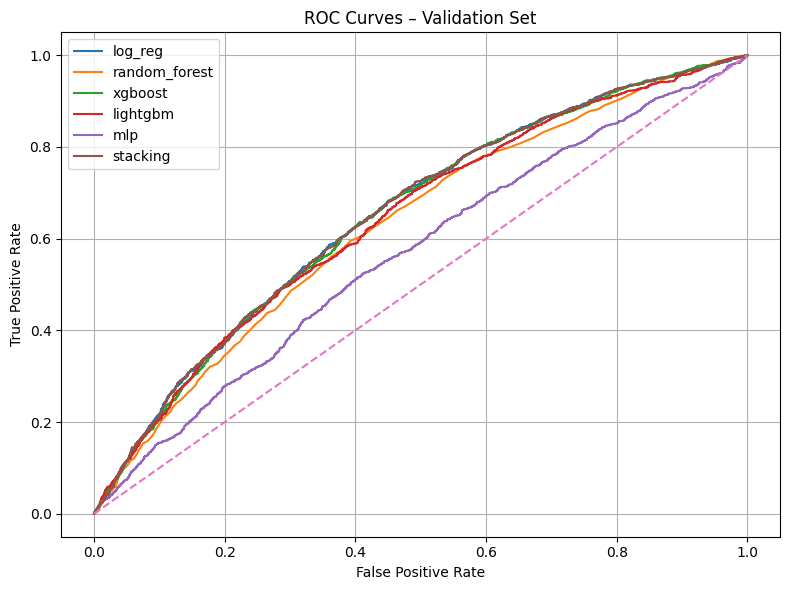

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for roc_d in val_roc_curves:
    plt.plot(roc_d["fpr"], roc_d["tpr"], label=roc_d["model"])

plt.plot([0, 1], [0, 1], linestyle="--")  # random baseline

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot Precision-Recall curves for all models (validation set)

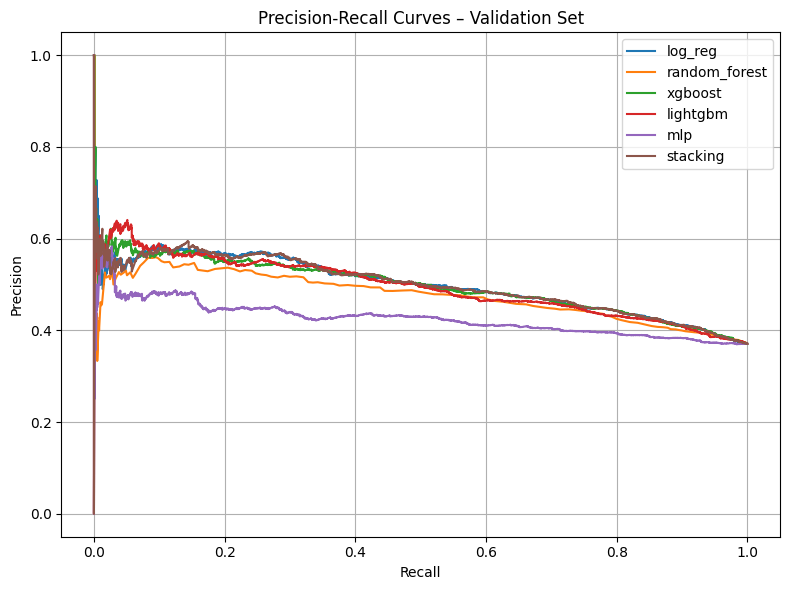

In [74]:
plt.figure(figsize=(8, 6))

for pr_d in val_pr_curves:
    plt.plot(pr_d["recall"], pr_d["precision"], label=pr_d["model"])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves – Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final evaluation on the test set (only best model)

In [75]:
best_model_name = val_metrics_df.iloc[0]["model"]
best_model = models[best_model_name]
best_model_name

'stacking'

In [76]:
test_metrics, test_roc_d, test_pr_d = evaluate_model(
    best_model_name, best_model, X_test, y_test, threshold=0.5
)

test_metrics

C:\Users\Mahul\.conda\envs\heartml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


{'model': 'stacking',
 'roc_auc': 0.6440616875454146,
 'pr_auc': 0.5030441668817214,
 'accuracy': 0.6491666666666667,
 'precision': 0.5642384105960265,
 'recall': 0.23919146546883774,
 'f1': 0.3359621451104101}

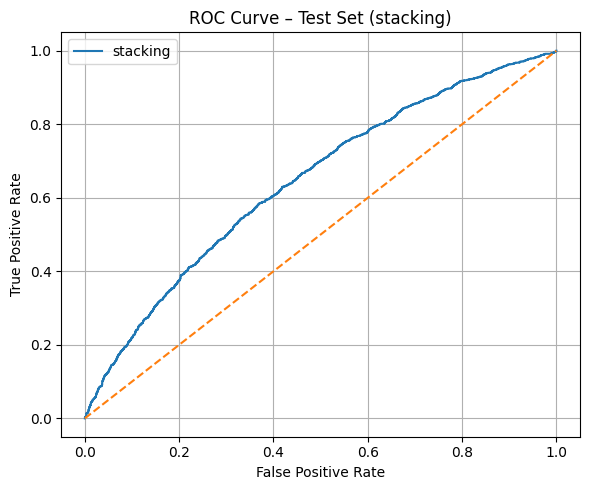

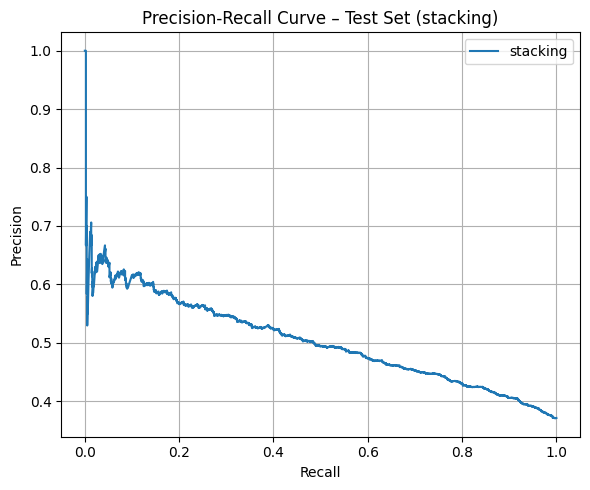

In [78]:
# ROC
plt.figure(figsize=(6, 5))
plt.plot(test_roc_d["fpr"], test_roc_d["tpr"], label=f"{best_model_name}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve – Test Set ({best_model_name})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PR
plt.figure(figsize=(6, 5))
plt.plot(test_pr_d["recall"], test_pr_d["precision"], label=f"{best_model_name}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve – Test Set ({best_model_name})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

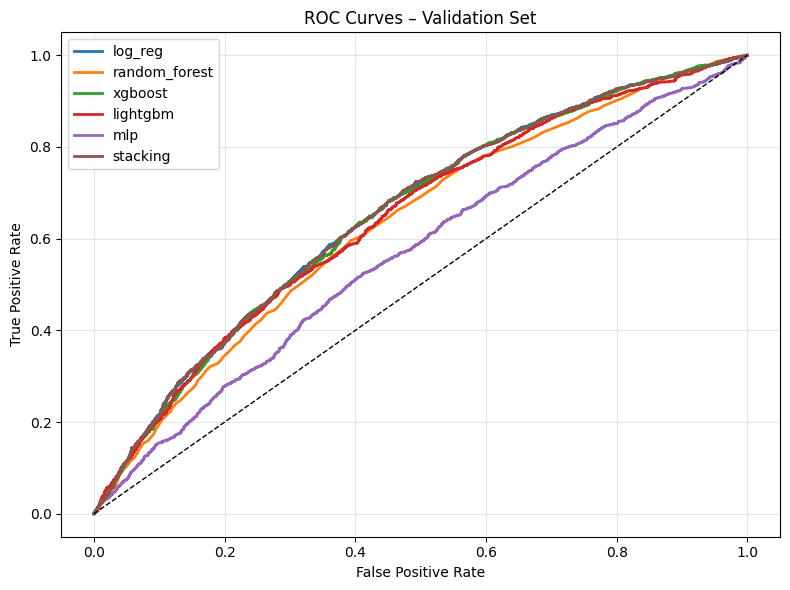

In [79]:
plt.figure(figsize=(8,6))

for roc_d in val_roc_curves:
    plt.plot(roc_d["fpr"], roc_d["tpr"], lw=2, label=roc_d["model"])

plt.plot([0,1],[0,1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Validation Set")
plt.legend(frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_curves_clean.png")
plt.show()


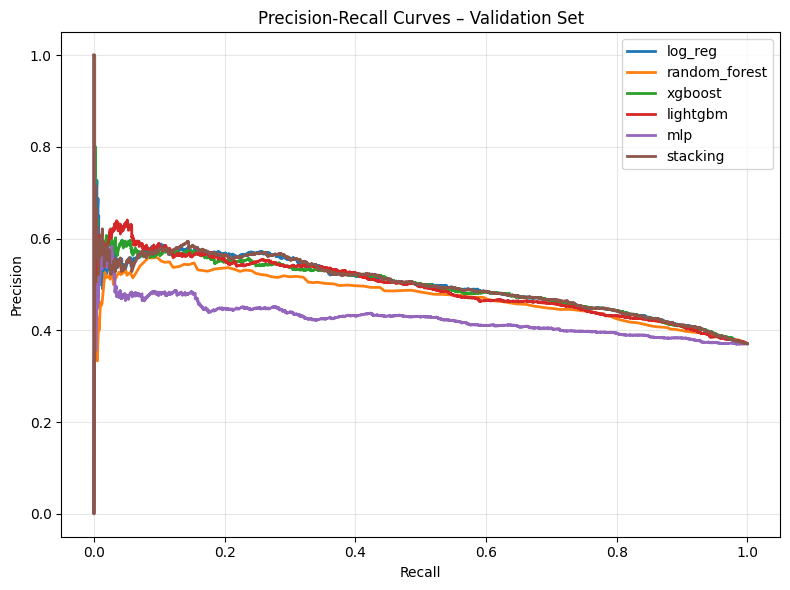

In [80]:
plt.figure(figsize=(8,6))

for pr_d in val_pr_curves:
    plt.plot(pr_d["recall"], pr_d["precision"], lw=2, label=pr_d["model"])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves – Validation Set")
plt.legend(frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("pr_curves_clean.png")
plt.show()


<Figure size 800x600 with 0 Axes>

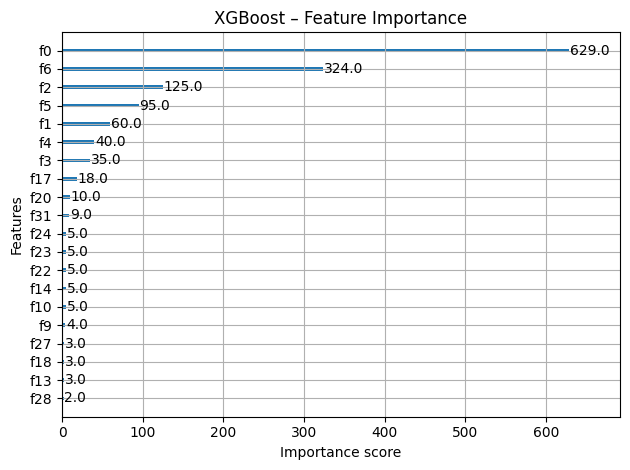

In [82]:
from xgboost import plot_importance

plt.figure(figsize=(8,6))
plot_importance(models["xgboost"].named_steps["model"], max_num_features=20)
plt.title("XGBoost – Feature Importance")
plt.tight_layout()
plt.savefig("xgb_feature_importance.png")
plt.show()


In [85]:
import numpy as np
import pandas as pd

rf_pipe = models["random_forest"]          # Pipeline
preprocess = rf_pipe.named_steps["preprocess"]
rf_model = rf_pipe.named_steps["model"]    # RandomForestClassifier

# 1) Numeric features (as-is)
num_features = numeric_features

# 2) Binary features (as-is)
bin_features = binary_features

# 3) Categorical OHE feature names
cat_transformer = preprocess.named_transformers_["cat"]
ohe = cat_transformer.named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

# Final feature name list in same order as model input
feature_names = np.concatenate([num_features, bin_features, cat_feature_names])

print("Total features seen by RF:", len(feature_names))
print("Feature importances length:", len(rf_model.feature_importances_))


Total features seen by RF: 33
Feature importances length: 33


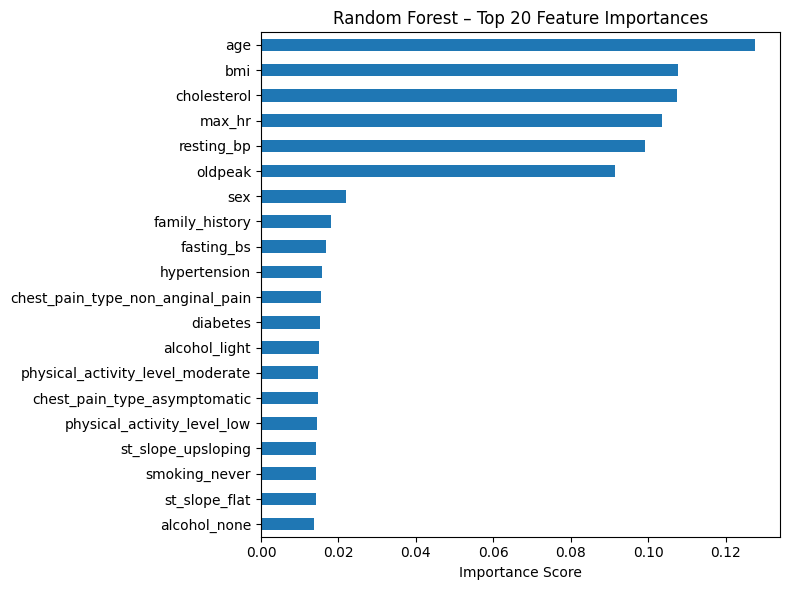

In [86]:
import matplotlib.pyplot as plt

rf_importances = pd.Series(
    rf_model.feature_importances_,
    index=feature_names
).sort_values(ascending=True)  # ascending for nicer barh plot

top_n = 20
top_rf = rf_importances.tail(top_n)

plt.figure(figsize=(8, 6))
top_rf.plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Random Forest – Top 20 Feature Importances")
plt.tight_layout()
plt.savefig("rf_feature_importance_top20.png", dpi=300)
plt.show()


In [87]:
!pip install shap

   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   -------------------------------------- - 524.3/548.0 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 548.0/548.0 kB 2.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.7 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.7 MB/s  0:00:01
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
    --------------------------------------- 0.8/38.1 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.3/38.1 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.4/38.1 MB 3.8 MB/s eta 0:00:10
   --- ------------------

In [88]:
import shap
import numpy as np
import pandas as pd

xgb_pipe = models["xgboost"]                # Pipeline
preprocess = xgb_pipe.named_steps["preprocess"]
xgb_model = xgb_pipe.named_steps["model"]   # XGBClassifier

# Transform X_val using the fitted preprocess
X_val_trans = preprocess.transform(X_val)

# Feature names same style as RF
cat_transformer = preprocess.named_transformers_["cat"]
ohe = cat_transformer.named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

feature_names = np.concatenate([
    numeric_features,
    binary_features,
    cat_feature_names
])

# Convert to DataFrame so SHAP plots have labels
if hasattr(X_val_trans, "toarray"):   # handle sparse matrix
    X_val_trans = X_val_trans.toarray()

X_val_shap = pd.DataFrame(X_val_trans, columns=feature_names)


In [89]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val_shap)

# For some SHAP versions, binary classification returns list [neg, pos]
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]   # positive class
else:
    shap_values_to_plot = shap_values


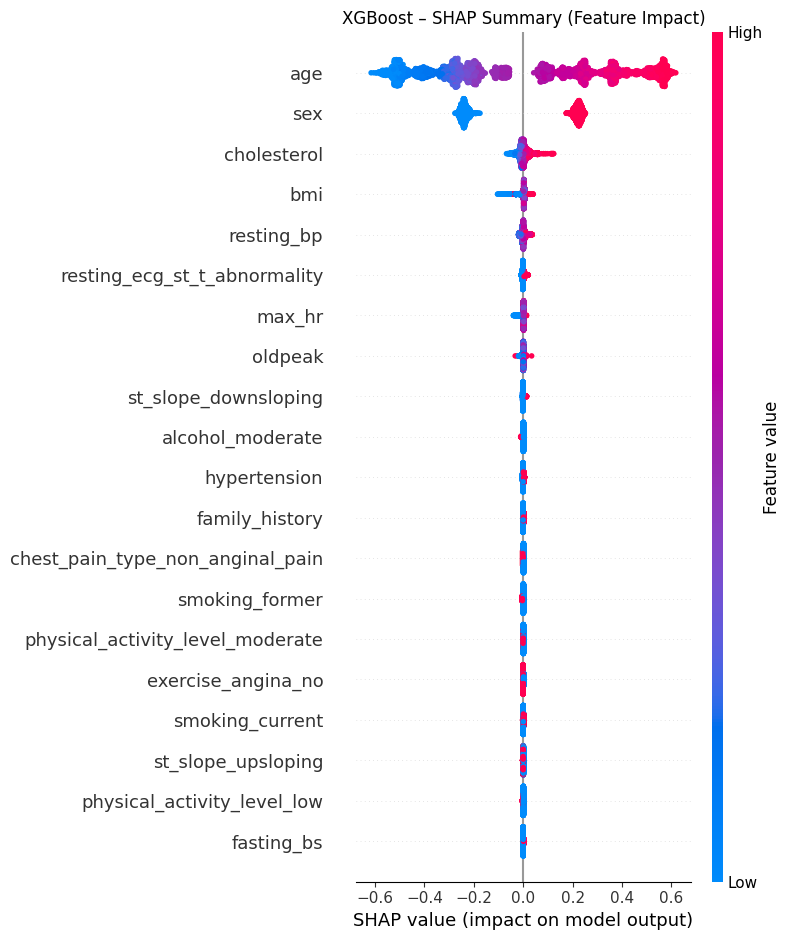

In [90]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values_to_plot, X_val_shap, show=False)
plt.title("XGBoost – SHAP Summary (Feature Impact)")
plt.tight_layout()
plt.savefig("shap_summary_xgb.png", dpi=300, bbox_inches="tight")
plt.show()


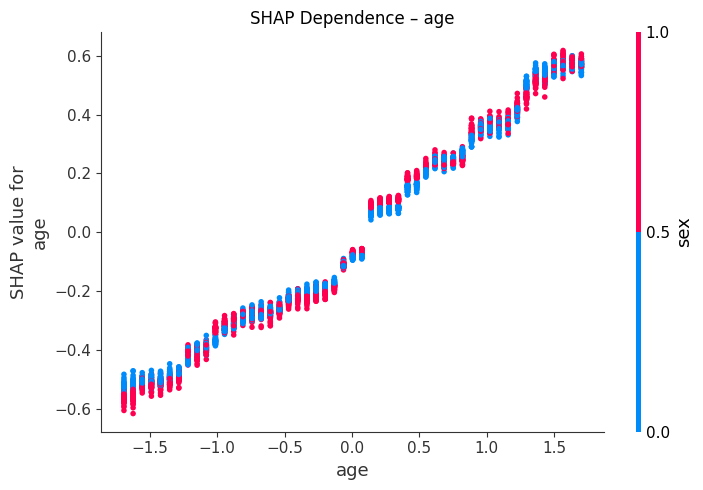

In [91]:
shap.dependence_plot(
    "age",
    shap_values_to_plot,
    X_val_shap,
    show=False
)
plt.title("SHAP Dependence – age")
plt.tight_layout()
plt.savefig("shap_dependence_age.png", dpi=300, bbox_inches="tight")
plt.show()


In [92]:
rf_pipe = models["random_forest"]
rf_model = rf_pipe.named_steps["model"]

# Take the first tree from the forest
estimator = rf_model.estimators_[0]


In [93]:
cat_transformer = rf_pipe.named_steps["preprocess"].named_transformers_["cat"]
ohe = cat_transformer.named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(binary_features) + list(cat_feature_names)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier


In [4]:
df = pd.read_excel("heart_disease_synthetic_30000.xlsx")

X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
numeric_features = ["age","resting_bp","cholesterol","max_hr","oldpeak","bmi"]
binary_features  = ["sex","fasting_bs","exercise_angina","smoking","diabetes","hypertension"]
categorical_features = ["chest_pain_type","resting_ecg","st_slope","physical_activity_level","alcohol","family_history"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("bin", "passthrough", binary_features),
    ("cat", Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])


In [6]:
models = {
    "xgboost": Pipeline([
        ("preprocess", preprocess),
        ("model", XGBClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        ))
    ]),
    "random_forest": Pipeline([
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(n_estimators=300, random_state=42))
    ]),
}


In [8]:
import joblib
joblib.dump(models["xgboost"], "best_model_xgboost.pkl")


['best_model_xgboost.pkl']

In [10]:
import matplotlib.pyplot as plt


In [11]:
plt.savefig("roc_curves.png", dpi=300)
plt.savefig("pr_curves.png", dpi=300)
plt.savefig("rf_feature_importance_top20.png", dpi=300)
plt.savefig("xgb_feature_importance.png", dpi=300)
plt.savefig("shap_summary_xgb.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [12]:
import os
os.getcwd()


'C:\\Users\\Mahul'

In [13]:
os.listdir()


['-1.14-windows.xml',
 '.ai-navigator',
 '.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.virtual_documents',
 '07 August.ipynb',
 '1 aug.ipynb',
 '10 august.ipynb',
 '10 jul.ipynb',
 '13 jul.ipynb',
 '13jun.ipynb',
 '15jun2.ipynb',
 '17 august.ipynb',
 '19JUNE.ipynb',
 '1jul.ipynb',
 '20july.ipynb',
 '21GAMES.ipynb',
 '24 august.ipynb',
 '24 july.ipynb',
 '26june.ipynb',
 '27july2025.ipynb',
 '28 aug.ipynb',
 '28june.ipynb',
 '29jun.ipynb',
 '29june2.ipynb',
 '30july.ipynb',
 '31 aug.ipynb',
 '4 sept.ipynb',
 'AMIRGADH_MASTER__-_REPORT_OCTOBER_2025 (1) (2).xlsx',
 'anaconda_projects',
 'app.ipynb',
 'AppData',
 'Application Data',
 'app_end.ipynb',
 'best_model_xgboost.pkl',
 'build',
 'Canada - new1.csv',
 'Canada.xlsx',
 'Canada11.csv',
 'Canadanew.csv',
 'catboost_info',
 'class11 -6jul .ipynb',
 'cleaned_file.csv',
 'cleaned_file_fixed.csv',
 'Contacts',
 'Cookies',
 'CrossDevice',
 'day 10- 3jun.ipy

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])


In [21]:
rf_model = rf_pipe.named_steps["model"]


In [17]:
preprocess = rf_pipe.named_steps["preprocess"]

cat_transformer = preprocess.named_transformers_["cat"]
ohe = cat_transformer.named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(binary_features) + list(cat_feature_names)


In [22]:
estimator = rf_model.estimators_[0]
print("Tree extracted successfully:", estimator)
                            Traceback (most recent call last)
Cell In[22], line 1
----> 1 estimator = rf_model.estimators_[0]
      2 print("Tree extracted successfully:", estimator)


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'